![Py4Eng](img/logo.png)

# Inference and transfer learning with pre-trained models
## Yoav Ram

In this session we will pre-trained models to classify images.
In this case, the models were pre-trained by other researchers.
We start with TensorFlow and then show an example with Keras.

# Inference with pre-trained models

Using pre-trained models is easy with Keras.

Let's load the [ResNet50 model](https://keras.io/applications/#resnet50) directly from the `keras.applications` module, together with some processing utilities. This follows code from [Keras docs](https://keras.io/applications/).

[ResNet50](https://github.com/KaimingHe/deep-residual-networks) was developed by Microsoft and was also trained in ImageNet data (like Inception).
It uses [residual learning](https://arxiv.org/abs/1512.03385) to train very deep networks, up to 152 layers.
A nice summmary on residual learning is available [here](https://blog.waya.ai/deep-residual-learning-9610bb62c355).

In [1]:
%matplotlib inline
import numpy as np
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.utils import plot_model

Using TensorFlow backend.


First, load the model (including downloading it, which may take some time).

In [59]:
model = ResNet50(weights='imagenet')

Now, let's see the ResNet50 architecture.

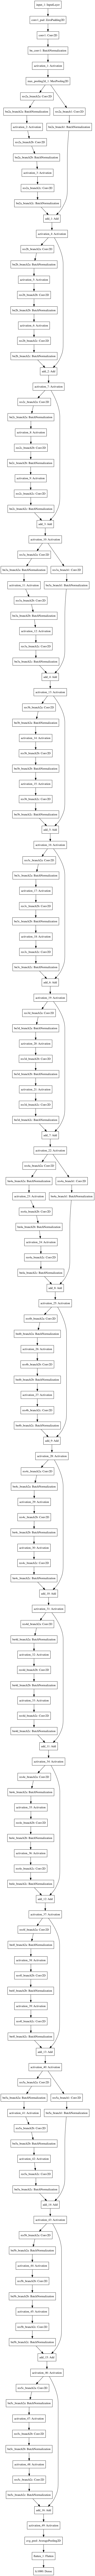

In [60]:
plot_model(model, to_file='tmp.png')
image.load_img('tmp.png')

That's really nice.

Load an image, convert it to array, and preprocess it for ResNet50.

In [63]:
img_path = '../data/Kobe_Bryant_2014.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

Now use the model to predict and then decode the predictions into a list of tuples (class, description, probability), one such list for each sample in the batch.

basketball (prob = 0.9993)
football_helmet (prob = 8.119e-05)
ballplayer (prob = 8.015e-05)


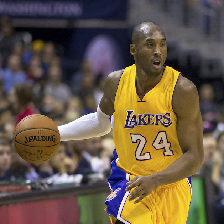

In [64]:
preds = model.predict(x)
decoded_preds = decode_predictions(preds, top=3)[0]
# print('Predicted:', decode_predictions(preds, top=3))
# print(preds)
for id_, label, prob in decoded_preds:
    print('{} (prob = {:.4g})'.format(label, prob))
img

# Transfer learning

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

In *transfer learning* we transfer knowledge gained on one problem to solve another problem.

In this case, we'll use the model we trained on MNIST digits to solve the MNIST-fashion: This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST (see [keras docs](https://keras.io/datasets/) for details). The class labels are:


| Label |	Description|
|---|------------------|
| 0 |	T-shirt/top    |
| 1 |	Trouser        |
| 2 |	Pullover       |
| 3 |	Dress          |
| 4 |	Coat           |
| 5 |	Sandal         |
| 6 |	Shirt          |
| 7 |	Sneaker        |
| 8 |	Bag            |
| 9 |	Ankle boot     |

We load the fashion-MNIST data.

In [4]:
from keras.datasets import fashion_mnist

In [6]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
num_classes = np.unique(y_train).size
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


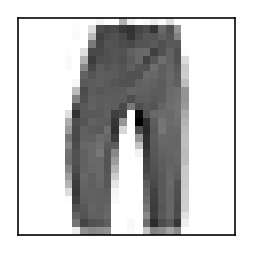

In [54]:
i = np.random.randint(0, x_train.shape[0])
plt.figure(figsize=(2,2))
plt.imshow(x_train[i, :, :], cmap='gray_r')
plt.xticks([]); plt.yticks([])
print(y_train[i])

Let's load the model we trained on MNIST data in the [CNN session](K_CNN.ipynb).

In [3]:
model = keras.models.load_model('../data/keras_cnn_model.h5')

We extract the readout (output layer), and re-initialize it.

In [55]:
session = keras.backend.get_session()

output_layer = model.get_layer(index=-1)
output_layer.kernel.initializer.run(session=session)

Finally, we re-train the model on the new data.

In [56]:
history = model.fit(
    x_train, y_train,
    batch_size=50,
    epochs=5,
    validation_data=(x_test, y_test)
).history

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 63s 1ms/step - loss: 0.3986 - acc: 0.8555 - val_loss: 0.3068 - val_acc: 0.8862
Epoch 2/5
60000/60000 [==============================] - 67s 1ms/step - loss: 0.2701 - acc: 0.8986 - val_loss: 0.2825 - val_acc: 0.8966
Epoch 3/5
60000/60000 [==============================] - 70s 1ms/step - loss: 0.2323 - acc: 0.9123 - val_loss: 0.2659 - val_acc: 0.9042
Epoch 4/5
60000/60000 [==============================] - 66s 1ms/step - loss: 0.2044 - acc: 0.9239 - val_loss: 0.2567 - val_acc: 0.9077
Epoch 5/5
60000/60000 [==============================] - 71s 1ms/step - loss: 0.1822 - acc: 0.9319 - val_loss: 0.2646 - val_acc: 0.9111


When starting from fresh (i.e. random weights; see [solution](solutions/CNN.ipynb), I got to validation accuracy 0.7815 after one epoch and to 0.8776 after 10 epochs.
So this approach is certainly faster, if you already have another network to start with.

## Colophon
This notebook was written by [Yoav Ram](http://python.yoavram.com) and is part of the [_Data Science with Python_](https://github.com/yoavram/DataSciPy) workshop.

The notebook was written using [Python](http://python.org/) 3.6.5.

This work is licensed under a [CC BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0/) International License.

![Python logo](https://www.python.org/static/community_logos/python-logo.png)